<a href="https://colab.research.google.com/github/anoobapk/mca-project/blob/main/Try_on.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/Dataset/Test_Data

In [ ]:
!ls

In [ ]:
!pip install opencv-python-headless

In [ ]:
from PIL import Image

image_path = '/content/drive/MyDrive/Dataset/Test_Data/test_img/000010_0.jpg'
image = Image.open(image_path)

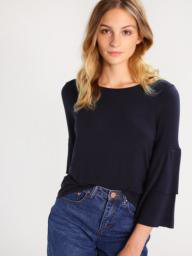

In [ ]:
image.show()

In [ ]:
cd test_color

/content/drive/MyDrive/Dataset/Test_Data/test_color


In [ ]:
!ls

 000001_1.jpg	     003852_1.jpg   007797_1.jpg   011736_1.jpg   015688_1.jpg
 000010_1.jpg	     003861_1.jpg   007808_1.jpg   011745_1.jpg   015697_1.jpg
 000020_1.jpg	     003874_1.jpg   007817_1.jpg   011761_1.jpg   015707_1.jpg
 000028_1.jpg	     003882_1.jpg   007826_1.jpg   011769_1.jpg   015715_1.jpg
 000038_1.jpg	     003890_1.jpg   007834_1.jpg   011781_1.jpg   015724_1.jpg
 000048_1.jpg	     003898_1.jpg   007848_1.jpg   011790_1.jpg   015732_1.jpg
 000057_1.jpg	     003915_1.jpg   007856_1.jpg   011798_1.jpg   015740_1.jpg
 000066_1.jpg	     003925_1.jpg   007864_1.jpg   011806_1.jpg   015748_1.jpg
 000074_1.jpg	     003935_1.jpg   007874_1.jpg   011816_1.jpg   015759_1.jpg
 000082_1.jpg	     003945_1.jpg   007882_1.jpg   011825_1.jpg   015767_1.jpg
 000097_1.jpg	     003953_1.jpg   007891_1.jpg   011833_1.jpg   015776_1.jpg
 000109_1.jpg	     003963_1.jpg   007899_1.jpg   011842_1.jpg   015785_1.jpg
 000118_1.jpg	     003972_1.jpg   007914_1.jpg   011850_1.jpg   015794_1.jpg

NOW SELECT ANY OF THE IMAGE CLOTH FOR FITTING

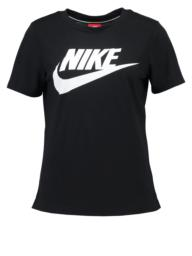

In [ ]:
from IPython.display import Image
Image("018690_1.jpg")

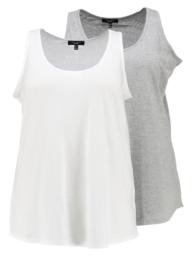

In [ ]:
from IPython.display import Image
Image("013772_1.jpg")

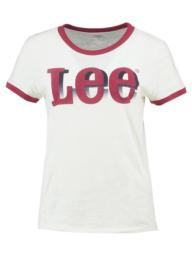

In [ ]:
from IPython.display import Image
Image("004710_1.jpg")

In [ ]:
import os
os.getcwd()

'/content/drive/MyDrive/Dataset/Test_Data/test_color'

NOW CHANNGING THE PATH FROM THE DATASET TO THE GOOGLE DRIVE WORKING DIRECTORY

In [ ]:
cd ..

/content/drive/MyDrive/Dataset/Test_Data


In [ ]:
cd /content/drive/MyDrive/Working/Notebook.ipynb

[Errno 20] Not a directory: '/content/drive/MyDrive/Working/Notebook.ipynb'
/content/drive/MyDrive/Dataset/Test_Data


In [ ]:
ls

Dataset/      test_color/      test_edge/  test_label/  test_pose/
mca-project/  test_colormask/  test_img/   test_mask/


LINKING TO THE GITHUB REPO

In [ ]:
import os
os.getcwd()

'/content/drive/MyDrive/Dataset/Test_Data'

In [ ]:
!git clone https://github.com/anoobapk/mca-project.git
%cd mca-project

fatal: destination path 'mca-project' already exists and is not an empty directory.
/content/drive/MyDrive/Dataset/Test_Data/mca-project


In [ ]:
ls

A_Flow-Based_Generative_Network_for_Photo-Realistic_Virtual_Try-on.pdf
Dataset/
README.md
uidesign.py
virtualtryon-1.ipynb
virtualtryon-2.ipynb
virtualtryon-3.ipynb


COPYING DATASET(LOADING)

In [ ]:
!mkdir Dataset

mkdir: cannot create directory ‘Dataset’: File exists


In [ ]:
!rm -r Dataset


rm: cannot remove 'Dataset/test_mask': Directory not empty


In [ ]:
!mkdir Dataset


mkdir: cannot create directory ‘Dataset’: File exists


In [ ]:
ls

A_Flow-Based_Generative_Network_for_Photo-Realistic_Virtual_Try-on.pdf
Dataset/
README.md
uidesign.py
virtualtryon-1.ipynb
virtualtryon-2.ipynb
virtualtryon-3.ipynb


COPYING DATASET (COLOR, EDGE, MASK, COLORMASK)

In [ ]:
# copy  dataset
!cp -r /content/drive/MyDrive/Dataset/Test_Data/test_color Dataset
!cp -r /content/drive/MyDrive/Dataset/Test_Data/test_edge Dataset
!cp -r /content/drive/MyDrive/Dataset/Test_Data/test_mask Dataset
!cp -r /content/drive/MyDrive/Dataset/Test_Data/test_colormask Dataset

In [ ]:
# copy TestData
!cp -r /content/drive/MyDrive/Dataset/Test_Data/test_img Dataset
!cp -r /content/drive/MyDrive/Dataset/Test_Data/test_pose Dataset
!cp -r /content/drive/MyDrive/Dataset/Test_Data/test_label Dataset

In [ ]:
ls

In [26]:
import os
print('test image    :', len(os.listdir('./Dataset/test_img')))   # test image (person with clothes)
print('test pose     :', len(os.listdir('./Dataset/test_pose')))  # pose keypoints per test image
print('test label    :', len(os.listdir('./Dataset/test_label'))) # label (dark frame) of test image (for pose-map)
print('test color    :', len(os.listdir('./Dataset/test_color')))     # color clothes  
print('test edge     :', len(os.listdir('./Dataset/test_edge')))      # edge of clothes
print('test mask     :', len(os.listdir('./Dataset/test_mask')))      # test mask        
print('test colormask:', len(os.listdir('./Dataset/test_colormask'))) # test colormask

FileNotFoundError: ignored

Read pose

In [24]:
# read pose
import numpy as np
import json

pose_name = "/content/drive/MyDrive/Dataset/Test_Data/test_pose/000001_0_keypoints.json"
with open(pose_name, 'r') as f:
     pose_label = json.load(f)
     pose_data = pose_label['people'][0]['pose_keypoints']
     pose_data = np.array(pose_data)
     pose_data = pose_data.reshape((-1,3))
print(pose_data)
print(len(pose_data))

[[1.11118110e+02 3.04872727e+01 9.11333680e-01]
 [1.06834646e+02 8.09890909e+01 7.91559875e-01]
 [7.45826772e+01 7.44727273e+01 7.21727289e-01]
 [6.29921260e+01 1.39170909e+02 4.29177985e-01]
 [5.06456693e+01 1.98981818e+02 6.39894508e-01]
 [1.37070866e+02 8.61090909e+01 6.33171842e-01]
 [1.41354331e+02 1.49178182e+02 3.72977426e-01]
 [1.31779528e+02 2.25978182e+02 4.07722341e-01]
 [7.35748031e+01 2.01774545e+02 3.96848263e-01]
 [3.80472441e+01 2.55301818e+02 1.09410599e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.12881890e+02 2.04101818e+02 3.39129466e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.04566929e+02 2.37381818e+01 9.71781179e-01]
 [1.21700787e+02 2.51345455e+01 9.51698855e-01]
 [9.49921260e+01 3.16509091e+01 8.77784505e-01]
 [1.33543307e+02 3.49090909e+01 9.04681012e-01]]
18


In [21]:
pip install tensorboardX

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 11.7 MB/s eta 0:00:00


SHOWING KEY POINGS ON TESTING IMAGE

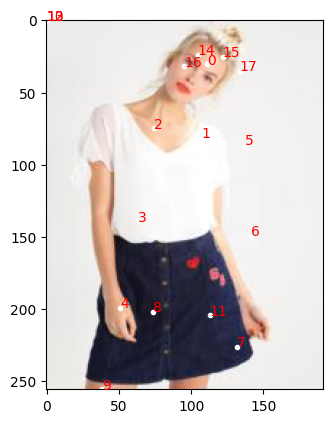

18


In [27]:
import matplotlib.pyplot as plt
img = plt.imread('/content/drive/MyDrive/Dataset/Test_Data/test_img/000020_0.jpg')
plt.imshow(img)
i=0
for x,y,z in pose_data: 
    plt.plot(x, y, 'w.') # 'w.': color='white', marker='.'
    plt.text(x, y, str(i), color='r', fontsize=10)
    i+=1
plt.show()
print(i)

Semantic Segmentation: PSPNet-MobileNet-v2

In [10]:
!git clone https://github.com/rkuo2000/semantic-segmentation-pytorch # predict.py add output a _gray.png
%cd semantic-segmentation-pytorch

Cloning into 'semantic-segmentation-pytorch'...
remote: Enumerating objects: 530, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 530 (delta 185), reused 174 (delta 174), pack-reused 337
Receiving objects: 100% (530/530), 37.47 MiB | 14.46 MiB/s, done.
Resolving deltas: 100% (293/293), done.
/content/semantic-segmentation-pytorch


In [16]:
from torchvision import transforms

from segmentation.data_loader.segmentation_dataset import SegmentationDataset
from segmentation.data_loader.transform import Rescale, ToTensor

from segmentation.predict import *
from segmentation.models import all_models


In [18]:
from posenet.utils import *


In [29]:
model_name = "pspnet_mobilenet_v2"
device = 'cuda'
batch_size = 4
n_classes = 34 
check_point_stride = 1 # store checkpoints every 1 epoch   
image_axis_minimum_size = 200

num_epochs = 0    # 1 for 1st training
                  # n for retraining
                  # 0 for detect-only
pretrained = False# True  for num_epochs=1 without logger.load_model below
                  # False for num_epochs=n with    logger.load_model below
                  # False for detect-only  with    logger.load_model below
fixed_feature = False

logger = Logger(model_name=model_name, data_name='example')

In [31]:
import torch
import torchvision

print("torch version:", torch.__version__)
print("torchvision version:", torchvision.__version__)


torch version: 2.0.0+cu118
torchvision version: 0.15.1+cu118


In [38]:
pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 35.4 MB/s eta 0:00:00


In [41]:
from torchvision.models import mobilenet_v2
model = mobilenet_v2(pretrained=True)
inverted_residual_block = model.features[1]


Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 103MB/s]


Pose Detection: PoseNet

In [6]:
!pip install tfjs-graph-converter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 32.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tensorflow-decision-forests to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━

In [7]:
file ="/content/drive/MyDrive/Dataset/Test_Data/test_pose/000001_0_keypoints.json"

In [9]:
pip install posenet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Detect label (semantic segmentation)

In [50]:
test_img_file   = '../Dataset/test_img/test_img/000001_0.jpg'
test_label_file = '../Dataset//test_label/000001_0.png'

In [52]:
from IPython.display import Image

In [48]:
import torch
from posenet.constants import *
from posenet.decode_multi import decode_multiple_poses
from posenet.models.model_factory import load_model
from posenet.utils import *

net = load_model(101)
net = net.cuda()
output_stride = net.output_stride
scale_factor = 1.0

input_image, draw_image, output_scale = posenet.read_imgfile(file, scale_factor=scale_factor, output_stride=output_stride)


ModuleNotFoundError: ignored

Detect Pose keypoints